# SVM code

##  Required Packages

In [22]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from sklearn import svm 

## 1. Binary  Classification

### Data load

이번에 사용할 데이터는 svm 이론을 쉽게 이해하기 위해 sklearn 데이터셋에서 random으로 점을 찍어 임의로 예쁜 데이터를 만들어 사용할 것이다.

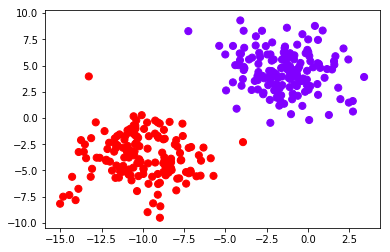

In [23]:
from sklearn.datasets import make_blobs


x, y = make_blobs(n_samples=300, centers=2,
                  random_state=1, cluster_std=2)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

### Train set 과 Test set 나누기

In [37]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

random_state=0은 꼭 해줄 필요는 없다. 다만 아래와 똑같은 결과를 원한다면 넣어주자.

### 모델 만들기

In [39]:
svm_linear=svm.SVC(C=1000, kernel='linear').fit(x_train,y_train)

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

위의 사이트는 scikit-learn 홈페이지에서 svm 함수를 설명하는 부분이다.

SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)[source]

아직 커널과 soft SVM을 안배워서 tol, max_iter 정도만 알면 된다.

### 결과확인

In [40]:
svm_linear.support_                # support vector의 index들

array([ 47, 133, 177])

In [41]:
svm_linear.support_vectors_        # support vectors

array([[ -4.32346324,   0.88511275],
       [-13.27261169,   3.96385686],
       [ -3.93599828,  -2.3041793 ]])

In [42]:
svm_linear.n_support_              # 각 클레스에 속한 support vectors 수

array([1, 2])

In [43]:
svm_linear.predict(x_test)         # 새로운 데이터 예측

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0])

In [44]:
svm_linear.score(x_test,y_test)    # 모델 정확도

1.0

In [45]:
svm_linear.coef_                   # 선형모델의 계수들

array([[-0.45821289, -0.68253546]])

In [46]:
svm_linear.intercept_              # 선형모델의 절편값들

array([-2.37645474])

### 모델 시각화 

In [47]:
w_1=svm_linear.coef_[0][0]
w_2=svm_linear.coef_[0][1]
b=svm_linear.intercept_
xx=np.linspace(-15,2.5,10)

f=(-b-w_1*xx)/w_2       # w_1*x1-+w2*x2+b=0  
f_1=(-b-1-w_1*xx)/w_2   # w_1*x1-+w2*x2+b=-1  
f_2=(-b+1-w_1*xx)/w_2   # w_1*x1-+w2*x2+b=1

xx는 x축을 -15에서 2.5까지 10개의 점을 나타낸다. 그래서 10개의 x 값에 대한 포인트를 찾은 후 이들을  plot 명령어를 이용해 직선으로 연결한다. 그러므로 데이터의 분포가 바뀌면 xx의 범위도 바꿔주어야한다.

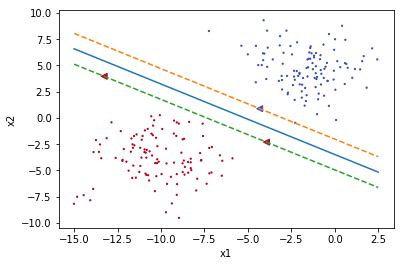

In [34]:
#데이터 점 찍기
plt.scatter(x_train[:,0],x_train[:,1], s=1.5 ,c=y_train, cmap=plt.cm.coolwarm)
#Support 점 찍기
plt.scatter(svm_linear.support_vectors_[:,0],svm_linear.support_vectors_[:,1], marker='<',c=y_train[svm_linear.support_], cmap=plt.cm.coolwarm)

#직선 그리기
plt.plot(xx,f)
plt.plot(xx,f_1,ls='dashed')
plt.plot(xx,f_2, ls='dashed')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()